# Predicting a Song's Popularity
**Fall 2025 Data Science Project**

Jordan Namie, Dean Dwiggins, Klint Faber, Meron Abera


**Contributions**


*   **Project Idea** looked through available datasets and coordinated with the team to pick a topic.
    * Jordan, Dean, Klint, Meron
*   **Dataset curation and Preprocessing** reviewing the general features of the selected dataset and making sure each of them is in a format that is usable and consistent. Null values were also taken care of at this stage
    * Jordan  
* **Data Exploration and Summary Statistics** The summary statistics give us a general overview of the dataset and provide a general path forward for the rest of the analysis. The data exploration tries to take a closer look at some of the features and understand how they may have impacted the streams of the songs we analyze
  * Meron -- One Way ANOVA
  * Dean  -- Correlation, Pearsons Coefficent
  * Meron -- Man-Whitney U
* **ML Algorithm Design/Development** After completing our data exploration, it is now our job to determine what kind of ML algorithm we should use to capture the variances and features in our data.
  * Jordan, Meron, Dean, Klint
* **ML Algorithm Training and Test Data Analysis** Now that the type of analysis has been decided, the next step is to split our data into training and test sets, to actually create and train the model, and analyze its accuracy
  * Jordan, Klint, Dean, Meron
* **Visualization, Result Analysis, Conclusion** Now that we have finished training the model and analyzed its accuracy, we visualize the results to see how well it works, and draw any conclusions we can about what we have learned and the success of the model
  * Dean, Meron, Jordan, Klint
* **Final Tutorial Report Creation** development of this tutorial that describes the process of developing an ML model from start to finish
  * Jordan, Klint, Meron, Dean

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import (mannwhitneyu, pearsonr, f_oneway)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Introduction

As a team, the first step in developing a machine learning model is identifying a topic we would like to explore. We chose to investigate the relationship between song characteristics and popularity using a dataset of Spotify tracks from 2023.

Our main questions include:

*  Is there a correlation between the valence of a song and its chart ranking?
*  Does the month a song is released impact its popularity?
* Are there relationships between a song's speechiness and its streams?
* What are the feature characteristics of determining a songs popularity?

Answering these questions can help future music producers understand what kinds of songs to develop and how to market them. Speechiness can help artists while writing. The release month can help determine when the song should be released for maximum popularity. Valence can help artists create songs with an emotional tone that appeals to listeners.

 helphData curation

The next step in the data science life cycle is the collection of relevant data to answer the identified question.

To find datasets that could help us answer this question we used the [Kaggle](https://www.kaggle.com/) database. Through our search we were able to find this dataset:
* [Top Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)

We deicded to use this dataset because not only does it list the top songs of 2023, but it also includes key features like the date of release, BPM of each song, a dancibility score, the key which the song is in, and how many playlists the song is in. We believed these features would provide a strong foudnation for identifying trends among the songs and building our predictive model.

To download the dataset:
1. Navigate to the Kaggle dataset page
2. Click the **Download** button and select **Download as ZIP**.
3. Extract the file into the same directory as your project so it can be accessed later

For the extent of this project, we will use the [Pandas library](https://pandas.pydata.org/docs/index.html). Pandas is an easy-to-use library integrated with Python coding to help manipulate and understand data.

We begin by loading the downloaded CSV data into the pandas **DataFrame** object ```songs_df```

We then display some general information about the data using the ```.info()``` function. This will tell use the shape of the data, as well as all the columns/features that exist within it.

In [304]:
songs_df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

By displaying the information, we see that our dataset has 24 columns and 953 rows.

We also find that there are null values in some of the columns, specifically in the `in_shazam_charts`, and `key` columns.

Another way to help you understand the data you imported is to examine a small slice of the dataframe. This can be done by using the ```.head()``` function.

If there is no argument within the parentheses, it will show us the first five rows of the data. If you add a numerical argument inside the parentheses, you will see that many rows of data.


In [305]:
songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


To prepare the data for analysis, we performed some key cleaning and transformation operations.

- For columns holding numeric data with a String data type, we converted some of the columns to numbers and coerced any errors during conversion.

- A `date` column was created, combining the separate `released_year`,`released_month` and `released_day` columns into a datetime object.

- We also added a `in_playlists` column combining the seperate `in_spotify_playlists`,`in_apple_playlists` and `in_deezer_playlists` columns into a single column that is the sum of all of the values.

- We did the same for the `in_charts` column combining the seperate `in_spotify_charts`,`in_apple_charts`, and `in_deezer_charts` columns by taking the mean.

  - We choose to ignore and drop the `in_shazam_charts` column as it has missing data for 50 of the entires.

In [306]:
# converting the given feature into a numeric value
songs_df['streams'] = pd.to_numeric(songs_df['streams'], errors='coerce')
songs_df['in_apple_playlists'] = pd.to_numeric(songs_df['in_apple_playlists'], errors='coerce')
songs_df['in_deezer_playlists'] = pd.to_numeric(songs_df['in_deezer_playlists'], errors='coerce')

# dropping the shazam_charts column
songs_df = songs_df.drop(['in_shazam_charts'],axis=1)

# creating a new date column using the month, day, and year values
songs_df['date'] = pd.to_datetime(
    {
        "year": songs_df["released_year"],
        "month": songs_df["released_month"],
        "day": songs_df["released_day"]
    }, yearfirst=True, errors='coerce')
# removing the individual month day and year columns
songs_df = songs_df.drop(['released_year','released_month','released_day'], axis=1)

#creating new columns for number of playsits a song is in and the number of charts it is on
# this will combine the columns with individual stremaing platform data
playlist_cols = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
chart_cols = ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']

songs_df['in_playlists'] = songs_df[playlist_cols].sum(axis=1)
songs_df['chart_rank'] = songs_df[chart_cols].mean(axis=1)

# removing the individual playlist and charts columns
songs_df = songs_df.drop(columns=playlist_cols + chart_cols)

Next, we looked for any other missing (NA) values we needed to account for.

```streams```
had one NA value, and since this is less than 1% of the data, we simply dropped the corressponding song/row.

```key```
had 95 NA values, however since we do not account for it in our statistical analysis, we remove the column altogether.

In [307]:
# Check for any na values, drop if less than 1% of data
rows_nan = songs_df[songs_df.isna().any(axis=1)]
nan_counts = songs_df.isna().sum()

print("Number rows with na: ", len(rows_nan))
display(nan_counts)

# Only 1 missing value in streams, just drop row (1 = .1 % of data)
songs_df = songs_df.dropna(subset = ['streams'])

# We will also not consider Key, so we will drop this column as it has NA values
songs_df = songs_df.drop(['key'],axis=1)

Number rows with na:  96


,0
track_name,0
artist(s)_name,0
artist_count,0
streams,1
bpm,0
key,95
mode,0
danceability_%,0
valence_%,0
energy_%,0


# Exploratory Data Analysis

Now that our data is prepared for analysis, we can examine the summary statistics and perform some data exploration to identify significant relationships.

Key steps:

* Summary statistics: Explore and describe basic dataset patterns

* Correlation (Playlists vs. streams): Test linear relationship using Pearson correlation

* ANOVA (streams by release month): Compare average streams across months

* Kruskal-Wallis (Tempo Group and Streams): Compare song BPM with streams

**NOTE** for each of the satistical tests we will use $\alpha = 0.05$


For these analyses we will need the help of these additional libraries:

* [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)
  * Provides the statistical functions necessary to conduct the analysis
* [MapPlotLib](https://matplotlib.org/stable/users/explain/quick_start.html)
  * Allows us to create visualizations to help identify and understand patterns in the results
* [Seaborn](https://seaborn.pydata.org/)
    * Another data visualization tool

## Summary Statistics

We will find the summary statistics using the panda's dataframe function `.describe()`



In [308]:
songs_df.describe()

,artist_count,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,date,in_playlists,chart_rank
count,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952,952.00000,952.000000
mean,1.556723,5.141374e+08,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,2018-09-28 21:30:15.126050560,5371.12395,22.218137
min,1.000000,2.762000e+03,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,1930-01-01 00:00:00,34.00000,0.000000
25%,1.000000,1.416362e+08,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,2020-07-12 06:00:00,914.50000,3.666667
50%,1.000000,2.905309e+08,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,2022-04-08 00:00:00,2306.00000,16.333333
75%,2.000000,6.738690e+08,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,2022-11-04 00:00:00,5995.25000,35.416667
max,8.000000,3.703895e+09,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,2023-07-14 00:00:00,53101.00000,140.000000
std,0.893331,5.668569e+08,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,NaN,8008.47401,22.246296


From these summary stats, we can see that most songs will typically be made by one artist. There are higher numbers for Spotify data, for example, a higher average of how many playlists a song is included in for Spotify, compared to other platforms.

Most songs tend to fall around 122BPM on average, with a standard deviation of 28 bpm. 120 is a pretty standard BPM for most songs. Energy and danceability come close with 64% and 67% averages, respectively.

Acousticness, instrumentalness, and liveness seem to have relatively low average percentages. This may indicate that most of these songs are produced electronically, but this can't be said for sure. For these analyses, we will need the help of these additional libraries:

## Correlation analysis
For the first analysis, we are analyzing if there is a correlation between the song's bpm and song's streams.

Method: Pearson correlation

- $H_O$: There is no correlation between bpm and Streams

- $H_A$: There is a positive correlation between bpm and Streams

Visualize the data using a scatter plot that shows the relationship between the number of playlists a song is in and streams.

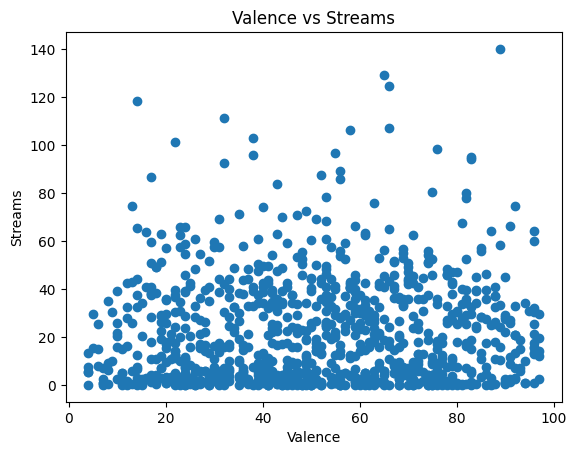

In [309]:
plt.scatter(songs_df['valence_%'], songs_df['chart_rank'])
plt.title('Valence vs Streams')
plt.xlabel('Valence')
plt.ylabel('Streams')
plt.show()

Compute the Pearson correlation coefficient and the P-value.



In [310]:
correlation_coefficient, p_value = pearsonr(songs_df['valence_%'], songs_df['chart_rank'], alternative="greater")
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.054635269385445176
P-value: 0.04601478960205079


**Conclusions**

Valence is the overall postivieity of the song's content. From our analysis we see:

1.   **Visual Evidence:** The scatter plot does not present an obvious pattern
2.   **Correlation Coefficient:** The Pearson Correlation Coefficient of 0.05 indicates a weak positive relationship between the two variables
3. **Statistical Significance:** As the p-value much less than 0.5, we are able to reject the null hypothesis


 Based on all three of these elements, **We reject the null hypothesis** and conclude that there is a statistically significant positive correlation between the valence a song is in and the number of times it is streamed.

## One Way ANOVA
For this next test we are checking if there is a statistically significant difference in average streams per month.

Method: One-Way ANOVA (Hypothesis Testing)
- $H_0$: The average streams are the same across all release months
- $H_A$: The average streams differs signficantly for at least one month

Compute the P-value using an one way ANOVA test

In [311]:
#extract month from date column
songs_df["month"] = songs_df["date"].dt.month

# Get streams for each month
months = {}
for m in range (1, 13):
  data = songs_df[songs_df["month"] == m]["streams"].values
  if len(data) > 1:
    months[m] = data

# Perform oneway ANOVA test
f, p = f_oneway(*months.values())

print("p-value: ", p)


p-value:  3.267617433013214e-07


Visualize the data as as box and whisker plots



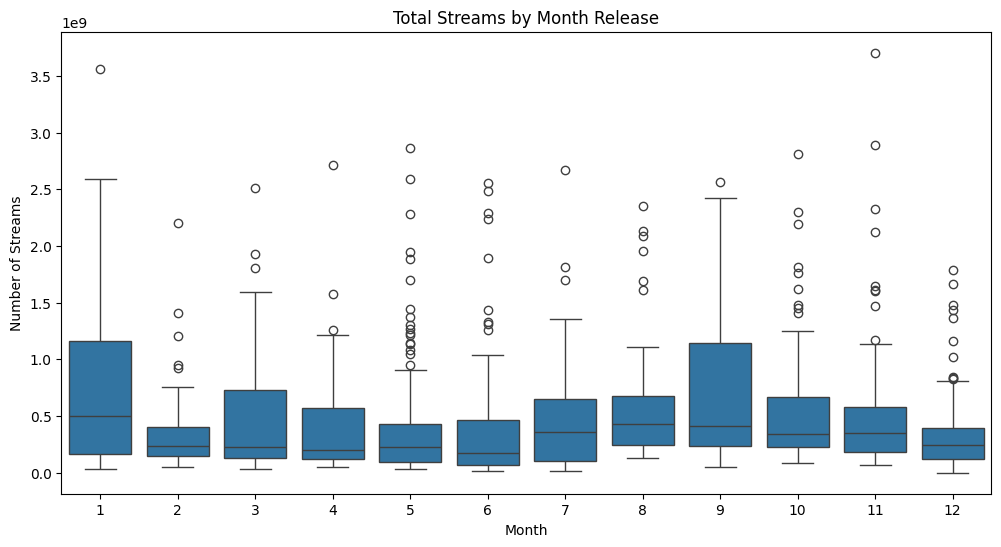

In [312]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = "month", y = "streams", data = songs_df)
plt.title("Total Streams by Month Release")
plt.xlabel("Month")
plt.ylabel("Number of Streams")
plt.show()

In [313]:
streams = songs_df['streams']
months = songs_df['month']

tukey_results = pairwise_tukeyhsd(endog=streams, groups=months, alpha=0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------
     1      2 -374352634.7206 0.0009 -655439847.2483 -93265422.1929   True
     1      3  -250453528.301 0.0522 -501976683.9268   1069627.3248  False
     1      4 -323360157.1597 0.0065 -597050650.0557 -49669664.2637   True
     1      5 -311837082.4173 0.0004 -536908533.0823 -86765631.7523   True
     1      6 -317461465.8592 0.0023  -568984621.485 -65938310.2334   True
     1      7  -245329659.256 0.1514 -524858486.3509  34199167.8389  False
     1      8   -96240435.939 0.9974 -407163358.2639 214682486.3859  False
     1      9    7138216.1898    1.0 -282424092.0006 296700524.3803  False
     1     10 -138603734.8625 0.8612 -403378945.0128 126171475.2878  False
     1     11 -174913866.3048 0.5294 -432101421.1498  82273688.5402  False
     1     12 -357932745.

**Conclusions**

The One-Way ANOVA test yielded a p-value of 3.27e-07 < 0.05, so we are able to reject the null hypothesis. This means that there is a statistically signficant difference in the average number of streams across at least one of the months.

After perfoming the Post-Hoc Tukey TSD Results, we find that the following month pairs have a statistically significant difference in average streams:
- Jan : Feb, Apr, May, Jun, Dec
- Feb : Sep
- Apr : Sep
- May : Sep
- Jun : Sep
- Sep : Dec

Observations:
- Certain months have higher or lower streams compared to others, which may indicate seasonal trends in song popularity
- September stands out for having the highest streams, compared to multiple other months
- January stands out for having significantly lower streams, compared to many other months.

## Mann-Whitney U-Test

For this test, we explore whether the distribution of streaming counts differs between songs with low speechiness and songs with high speechiness.

- $H_0$: There is no difference in the distribution of streams between songs with low speechiness and high speechiness

- $H_A$ : The distribution of streams is different for songs with low speechiness and high speechiness

To apply this test, we need to group the speechiness_% into high or low speechiness. Before grouping, we observe the skew of data:

In [314]:
speechiness_skew = songs_df['speechiness_%'].skew()
print("Speechiness skew:", speechiness_skew)

Speechiness skew: 1.9333565259038012


A skew value of 1.93 indicates a highly skewed data, so we split the data into two groups using the median.

Then we apply the mann-whitney U-test to the groups, and observe the p-value

Speechiness vs Streams p-value: 0.028544453582206402


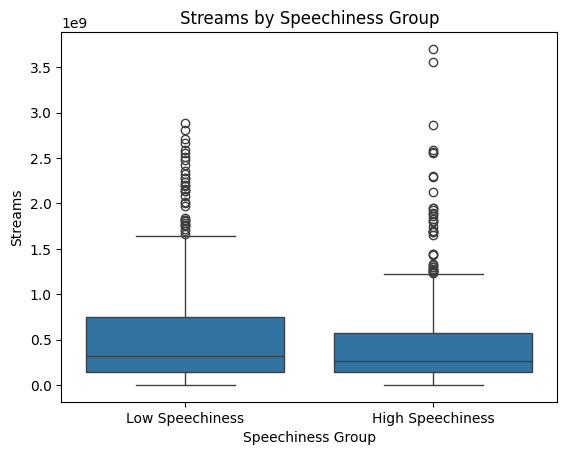

In [315]:
speechiness_median = songs_df['speechiness_%'].median()

low_speechiness = songs_df[songs_df['speechiness_%'] <= speechiness_median]['streams']
high_speechiness = songs_df[songs_df['speechiness_%'] > speechiness_median]['streams']

stat, p = mannwhitneyu(low_speechiness, high_speechiness, alternative='two-sided')
print("Speechiness vs Streams p-value:", p)

plt.figure()
sns.boxplot(x=['Low Speechiness']*len(low_speechiness) + ['High Speechiness']*len(high_speechiness),
            y=list(low_speechiness) + list(high_speechiness))
plt.title('Streams by Speechiness Group')
plt.ylabel('Streams')
plt.xlabel('Speechiness Group')
plt.show()

**Conclusions**

We observe a p-value of 0.0285 < 0.05, allowing us to reject the null hypothesis. This indicates that there is a statistically significant difference in distributions of streams between songs with higher spechiness and lower spechiness.

# Primary Analysis

We decided to frame our question as a classification task because we are interested in predicting whether a song will be "popular" or "not popular" based on certain features. To achieve this result, we will use a **logistic regression model** as it is suited for binary classification problems.

**Popularity Classification:** We define a song as popular if it has:
- chart_rank < 75
- streams in the top 25% of all data

We will evaluate the model based on accuracy, precision, and recall.

from sklearn, we will use


*   [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * used to divide the data into training and testing sets
*   [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
    * used to create the model
*   [evaluation metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics)
    * used to evaluate the model
*   [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
    *   used to define feature importance
*   [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
    *   Used to make pipeline that scales data and then trains model
*   [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
    *   Used to scale data before inputting to model
*   [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
    *   Used to encode string data

First, we want to determine what features are the most important in impacting popularity. To do this, we will split our data into training and testing data, and fit the training data on a `RandomForestClassifier`. We will then evaluate the most important features through the `feature_importances_` attribute.

We first encode any string columns with `LabelEncoder` in order to use them with SciKit. Then, we decided to take some features out completely as they would not make sense to keep.

Mainly, we removed the artist and track names as they were too specific for what our model is meant to do. We then removed the date column as we'd only be considering if the month a song was released had an impact on popularity as opposed to a very specific date. We also removed `chart_rank` and `streams` as those were used to determine if a song is labeled as popular or not, and also because an artist is not going to know or have control over the rank and streams of their song. We are trying to keep as many features within the control of the artist.

In [316]:
# making a copy of the data so changes here won't affect the original data
model_df = songs_df.copy()

model_df["streams"] = pd.to_numeric(
    model_df["streams"].astype(str).str.replace(",", "", regex=False),
    errors="coerce"
).fillna(0).astype(int)

# Label-encoding categorical data (mainly mode)
for column in model_df.columns:
    if model_df[column].dtype == object:
        model_df[column] = LabelEncoder().fit_transform(model_df[column])

# the X values will just come from the input features
feature_cols = [feature for feature in model_df.columns if feature not in ["track_name", "artist(s)_name", "date", "chart_rank", "streams"]]
X = model_df[feature_cols]

# Calculate the 75th percentile for streams
streams_75_percentile = model_df['streams'].quantile(0.75)

# we will encode a binary target for if the song is popular or not
Y = ((model_df["chart_rank"] < 75) & (model_df["streams"] > streams_75_percentile)).astype(int)
model_df["popularity"] = Y

# we split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create random forest to train data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)
importance_values = random_forest.feature_importances_

# Get feature importances
importances = pd.DataFrame({x:[y] for x,y in sorted(zip(feature_cols, importance_values), key=lambda x: x[1], reverse=True)})
display(importances)

,in_playlists,acousticness_%,month,energy_%,danceability_%,bpm,liveness_%,valence_%,speechiness_%,artist_count,instrumentalness_%,mode
0,0.55726,0.059026,0.055563,0.053966,0.052455,0.052013,0.049817,0.048747,0.03634,0.015935,0.009627,0.009251


Based on fitting our training data in a `RandomForestClassifier`, we can see the most important features are `in_playlists`, `acousticness_%`, `month`, `energy_%`, and `danceability_%`. These will be our input features for our logistic regression.

In [317]:
feature_cols = "in_playlists 	acousticness_% 	month 	energy_%    danceability_%".split()
X = model_df[feature_cols]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#creates the model
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# training the model on the training data
model.fit(X_train, Y_train)

# prediciting the outcomes using the testing data
y_pred = model.predict(X_test)

#calcualting the evaluation metrics
print(f"Accuracy: {accuracy_score(Y_test, y_pred)}")
print(f"Precision: {precision_score(Y_test, y_pred)}")
print(f"Recall: {recall_score(Y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")

print("Total counts of output labels")
print(Y.value_counts())

Accuracy: 0.8900523560209425
Precision: 0.8666666666666667
Recall: 0.6046511627906976
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       148
           1       0.87      0.60      0.71        43

    accuracy                           0.89       191
   macro avg       0.88      0.79      0.82       191
weighted avg       0.89      0.89      0.88       191

Total counts of output labels
0    725
1    227
Name: count, dtype: int64


# Analysis

Based on the results of our training, here are the following key points of our model performance:

1. Accuracy: We achieved an accuracy of 0.89, meaning that the model correctly classifies 89% of songs
2. Precision: Of all songs that the model predicted as popular, about 86% of them were truly popular
3. Recall: About 60% of truly popular songs were detected

Our accuracy rate of 89% and precision of 86% are both relatively high, meaning that our model performs pretty well when it comes to classifying each song and correctly identifying songs as popular. However, the recall of 60% is relatively low and indicates that the model struggles to flag many of the popular songs.

**Class by class comparison**

When looking at performance by class, we can get further insight:

- Class 0: Not popular
- Class 1: Popular

The precision rates for both classes are relatively the same; however, the recall for non-popular songs is significantly higher, with a near-perfect score of 0.97 compared to a low score of 0.60. This means that the model correctly identifies almost all truly non-popular songs, but misses about 40% of popular songs.

The F1 score represents a balance of precision and recall scores, and reflects the above situation, with 0.93 for non-popular songs and 0.71 for popular songs.

In general, the model does a good job at identifying non-popular songs and predicting popular songs with high precision. However, it misses many of the truly popular songs.

Strengths:
- High precision for popular songs, meaning few false positives (predicting a song as popular when it's not)
- Very good at identifying non-popular songs

Weaknesses:
- Recall for popular songs is low, meaning the model misses many popular songs
- Class imbalance impacts performance, with class 0 having 725 and class 1 having 227

## Application

For our model, in addition to accuracy, the evaluation metric we will focus on is **recall**. Recall is the model's ability to recognize positive/popular results when it sees them. For a tool that we want artists to use to predict if their song will be popular, it is important to avoid as many false negatives as possible. We want an artist to be able to use this model to see if they are on the right track with a song, and to aid in their future development. Therefore, it is important to try to catch as many songs with potential as possible; we will prefer this over precision, which gives the overall accuracy of all of the model's positive predictions. A recall of 60% means that it was able to catch 60% of the 43 positive entries in the testing dataset, or about 26 songs. This model could be improved in the future by including more data and more features in the model. It does offer significant benefits to an artist while they are developing their music.

## Conclusions
Overall, the results of this model indicate that the chosen input features can aid in predicting the popularity of songs, but don't paint a total picture. This indicates that there are other factors that may be bigger deciding factors.

# Visualization


The following plot shows how song popularity is distributed based on all feature inputs.

Because our model has 5 input features (energy, danceability, speechiness, valence, and playlist), we applied Principal Component Analysis to compress them.

From this point, we can create the plot, where each dot represents one song, and they are each colored based on their grouping.

Though there is some separation with the points (which correlates with the models high accuracy and precision), there is a lot of overlap (which is why recall is low and the model misses some popular songs).

Overall, this means that the chosen features alone cannot fully explain popularity. These results are supported by our ML model results above.

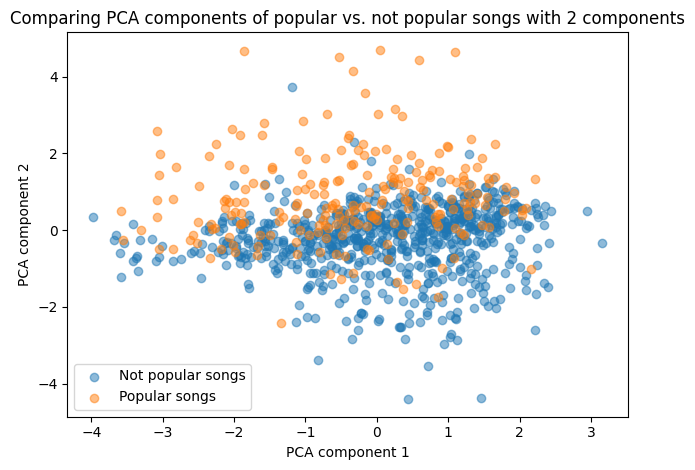

In [318]:
features = ['in_playlists', 'energy_%', 'danceability_%', 'speechiness_%', 'valence_%']

X = model_df[features]
y = model_df['popularity']

pca = PCA(n_components = 2, random_state=42)
X_scaled = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

comp1 = X_pca[:,0]
comp2 = X_pca[:,1]

components_df = pd.DataFrame({"comp1": comp1, "comp2": comp2, "results": y})

plt.figure()
plt.title("Comparing PCA components of popular vs. not popular songs with 2 components")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")

groups = []

for grname, table in components_df.groupby("results"):
    plt.scatter(table["comp1"], table["comp2"], alpha=0.5)
    groups.append("Popular songs" if grname == 1 else "Not popular songs")

plt.legend(groups)
plt.tight_layout()



# Insights and Conclusions

After reading our insights and viewing the performance of our model, the reader should be able to understand how the features of a song affect their popularity. We saw that how many playlists the song is in has the most effect on whether that song will be popular. We also saw that features like acousticness, energy, and danceability have an effect too. We have also noticed that there are trends in song popularity based on when they are released with September being a pretty big month, and we noticed that songs with less speechiness actually perform better than those with higher speechiness.

This tutorial aims to highlight what considerations go in the data analysis and machine learning processes to inform new readers how these processes connect. We walk through the process of data exploration and analysis through libraries like Pandas and Scipy that are used for manipulating large datasets and performing statistical analyses respectively. We also walk through how to develop a machine learning model based on our insights througk the library SciKit Learn. We cover how we found important features and how we trained our Logistic Regression model with those features.

Those familiar with these topics will have recognized and understood most of the concepts of our tutorial. However, they may have been introduced to different techniques that can be used to achieve different conclusions. They may also have learned that some of the features they thought were important to a song's popularity are not actually as significant as they expected.